<a href="https://colab.research.google.com/github/anasabbad/Bike-Sharing-Demand-Prediction--Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries and Loading the data set**

In [382]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [383]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
#loading the data
data= pd.read_csv('/content/drive/MyDrive/Capstone Projects/BikeSharingDemandPrediction_Capstone/SeoulBikeData (1).csv').replace([np.inf, -np.inf], np.nan)

In [385]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [387]:
data.shape

(8760, 14)

In [388]:
data.rename(columns = {'Rented Bike Count':'Rented_Bike_Count'}, inplace = True)

In [389]:
# total count of missing values column wise
data.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can see that there are no missing values.

In [390]:
data.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [391]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [392]:
# Adding a new column for Month in the dataFrame
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Handling Outliers**

<Figure size 504x504 with 0 Axes>

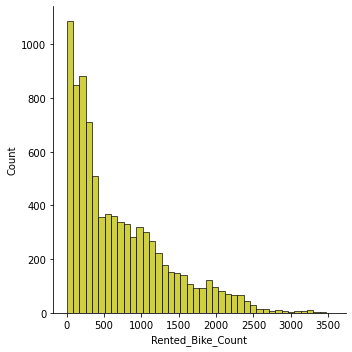

In [394]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.displot(data['Rented_Bike_Count'],color="y")

In [395]:
# Replace infinite updated data with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data.dropna(inplace=True)


In [396]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))
data['Rented_Bike_Count'] = data['Rented_Bike_Count'].apply(round_int)

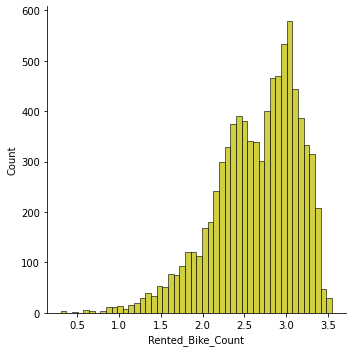

In [397]:

ax=sns.displot(np.log10(data['Rented_Bike_Count']), color="y")
plt.show()

In [398]:
data['Rented_Bike_Count_log'] = np.log2(data['Rented_Bike_Count'])

In [399]:
data['Rented_Bike_Count_log'] .describe()

count    8760.000000
mean            -inf
std              NaN
min             -inf
25%         7.577429
50%         8.978710
75%        10.056976
max        11.796040
Name: Rented_Bike_Count_log, dtype: float64

So it is better to do a Square Root Transform to avoid the infinity values

In [400]:
data=data.drop('Rented_Bike_Count_log', axis=1)

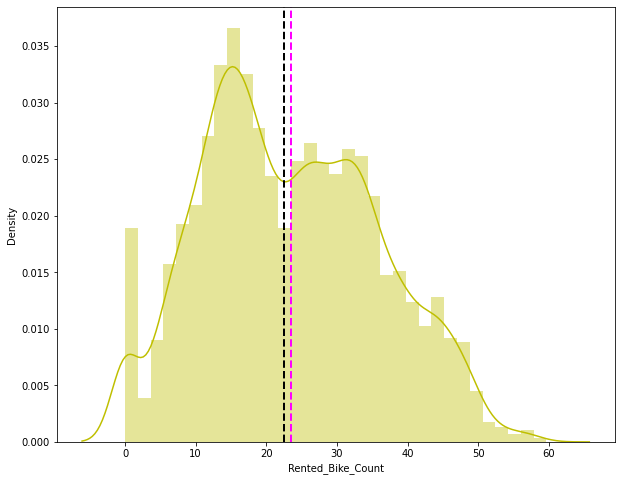

In [401]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

The distribution is much better now. So we can trsnform the Rented_Bike_Count using Square Root Transform

In [402]:
data['Rented_Bike_Count'] = np.sqrt(data['Rented_Bike_Count'])

# **Exploratory Data Analysis & Data Preparation**

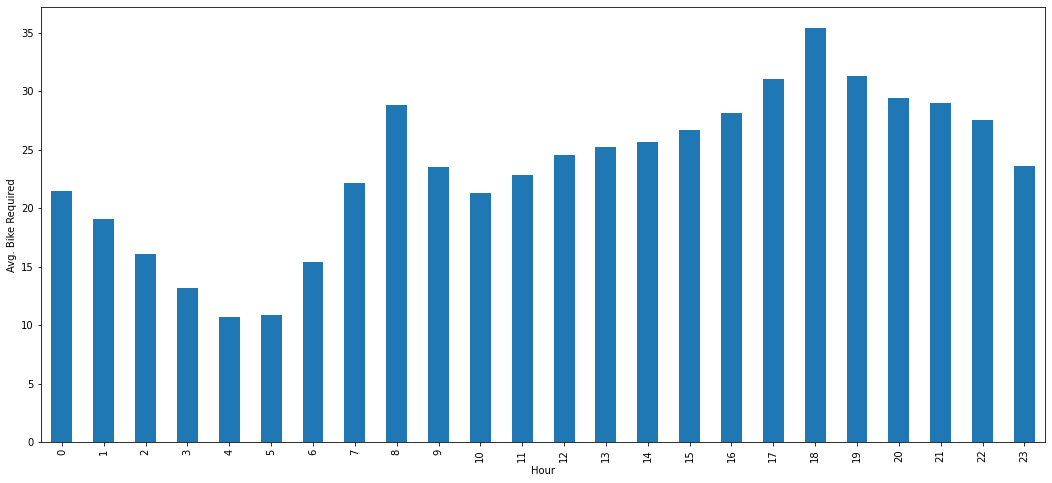

In [403]:
data.groupby('Hour').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

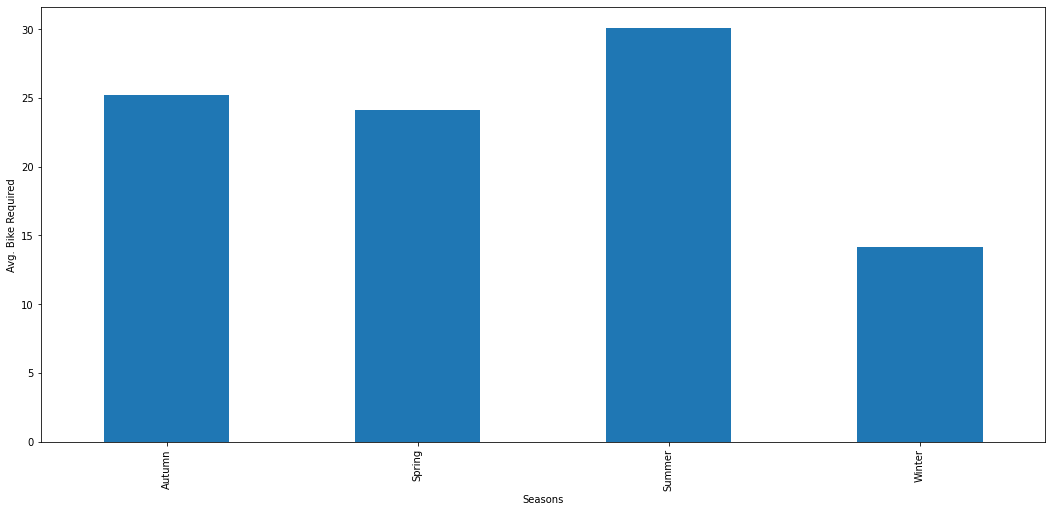

In [404]:
data.groupby('Seasons').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

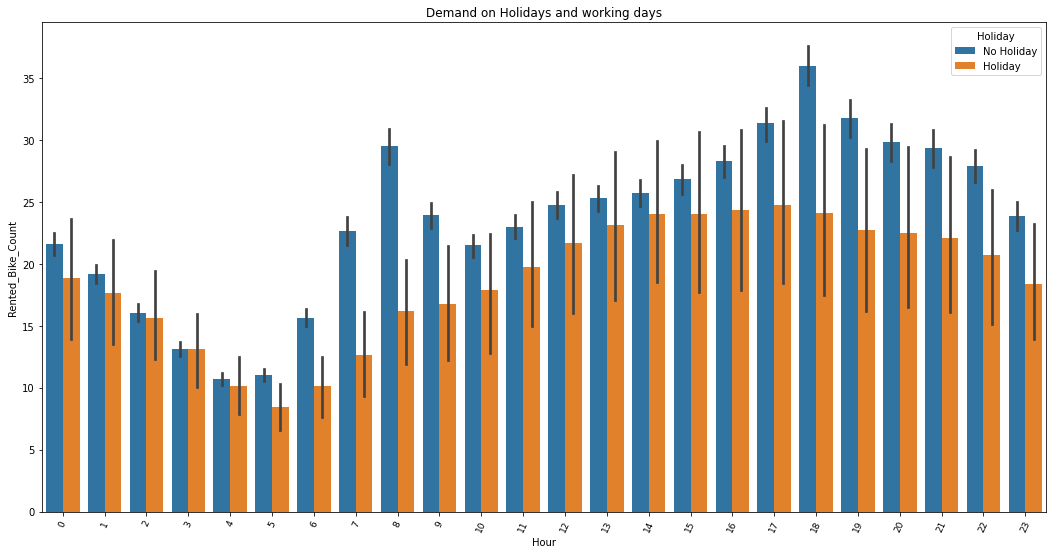

In [405]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Hour")
plt.ylabel("Rented_Bike_Count")
plt.title("Demand on Holidays and working days")
sns.barplot('Hour', 'Rented_Bike_Count', hue='Holiday', data=data);
plt.show()

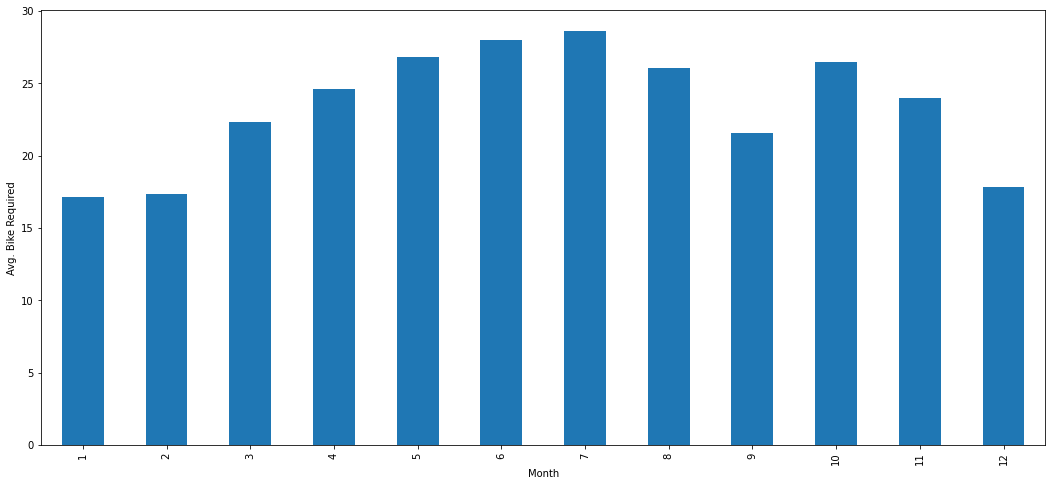

In [406]:
data.groupby('Month').Rented_Bike_Count.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. Bike Required')
plt.show()

**Infrenece:**


* The peak requirement for bikes are during the start and end of office hours
* The Bikes are most used in Summers and Least used during winters
*On holidays the demand is not that as much as that on Working days. But the trend of demand more or less remains the same
*The Demand for bikes are less during the start and end of the year and the demand grows till June and then shows a decrfeasing trend

In [407]:
numeric_features = data.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month'],
      dtype='object')

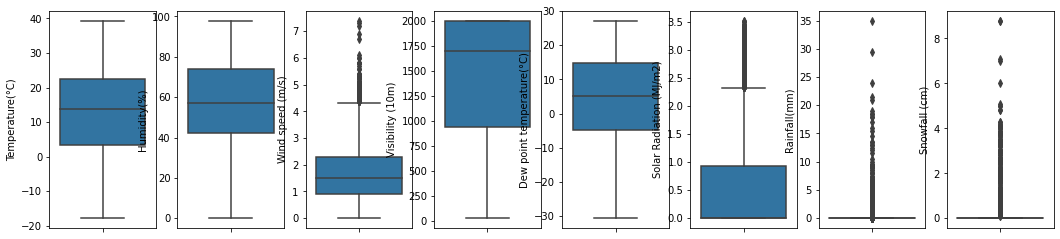

In [408]:
 #Draw box plots for indepent variables with continuous values
cont_features=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
plt.figure(figsize=(18,4))

i = 1
for col in cont_features:
    plt.subplot(1,8,i)
    sns.boxplot(y=col, data=data)
    i+=1

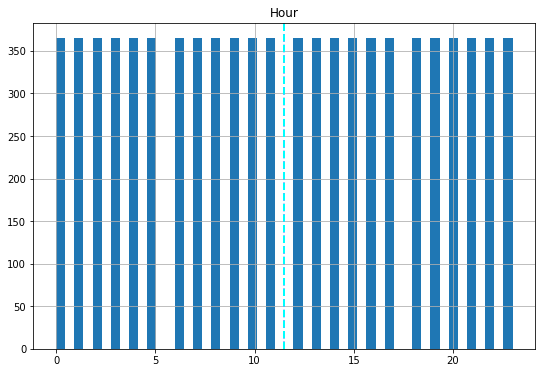

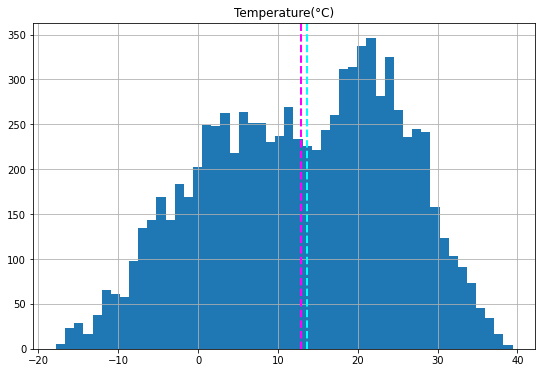

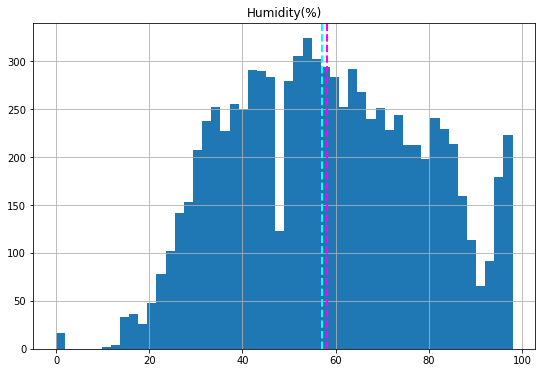

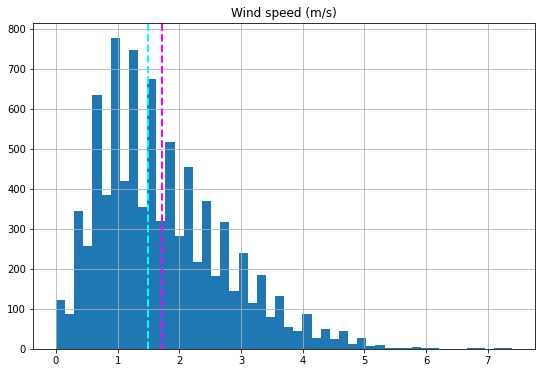

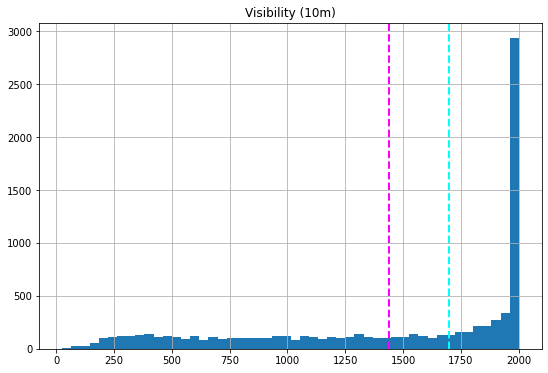

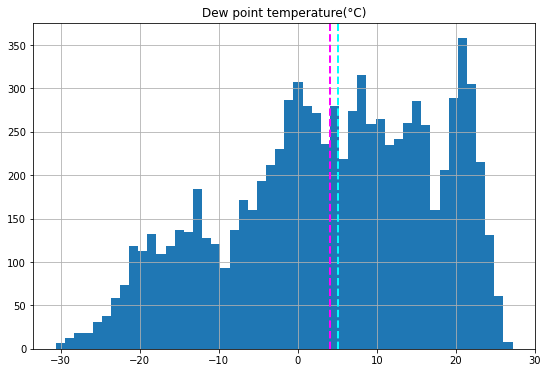

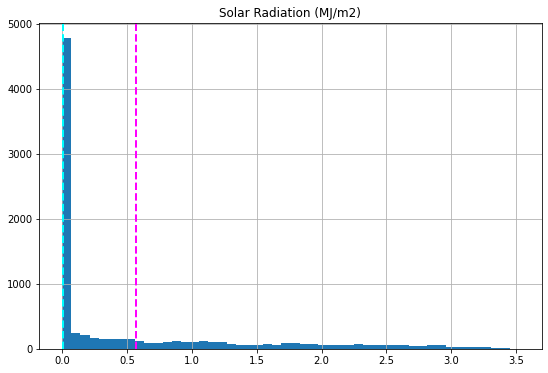

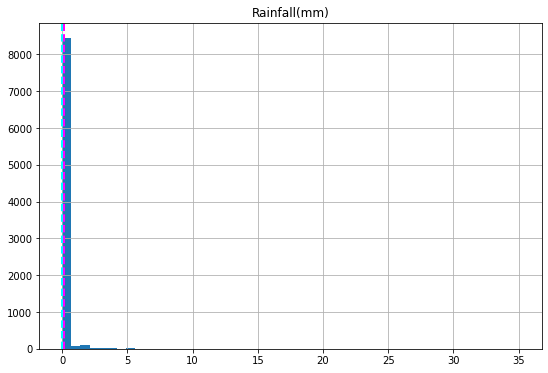

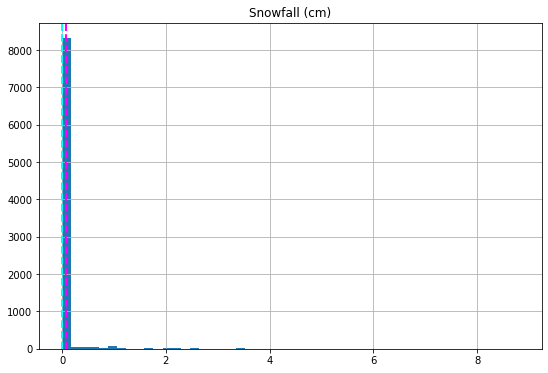

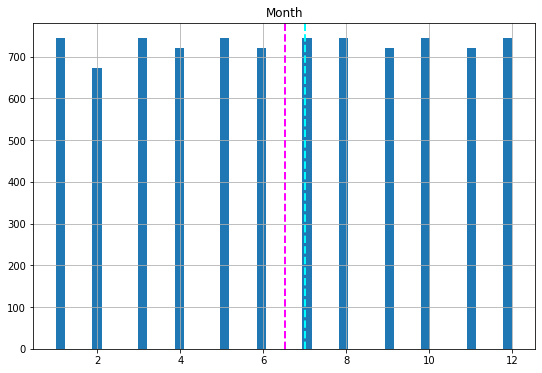

In [409]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

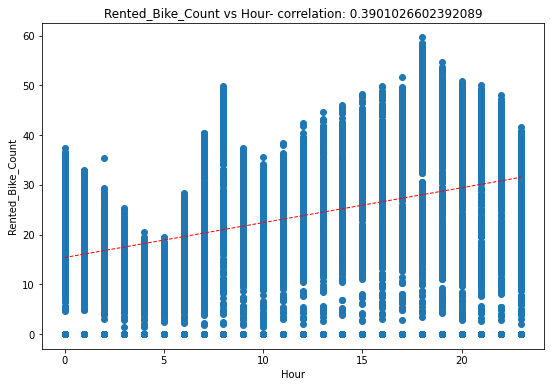

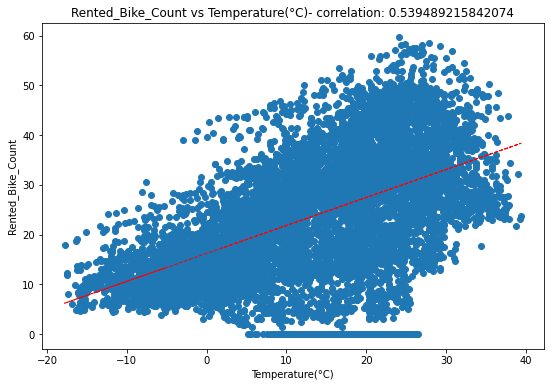

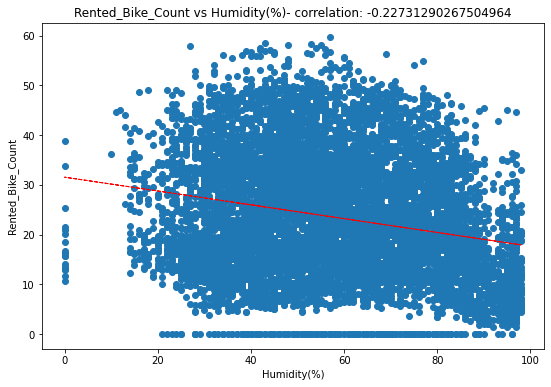

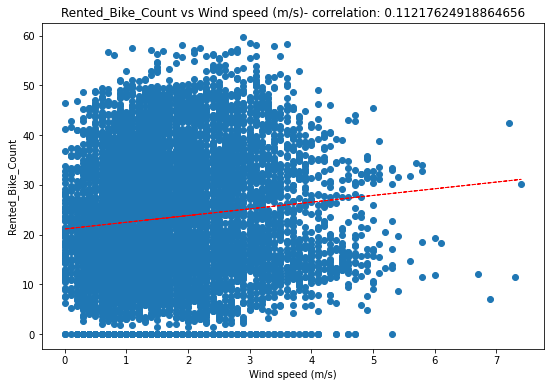

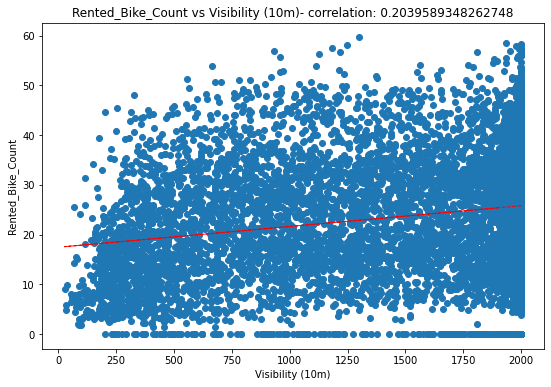

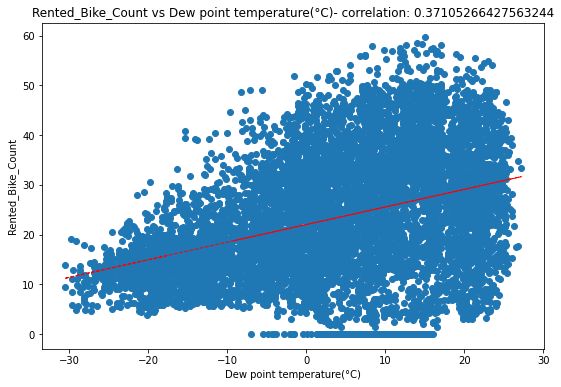

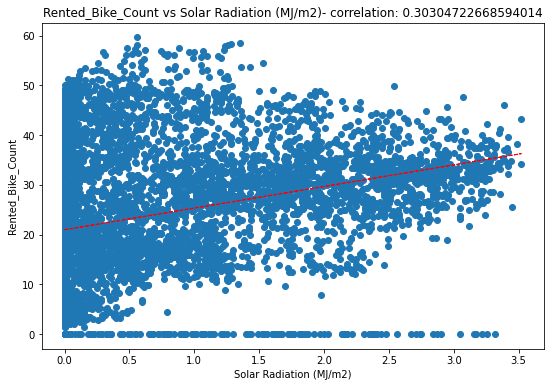

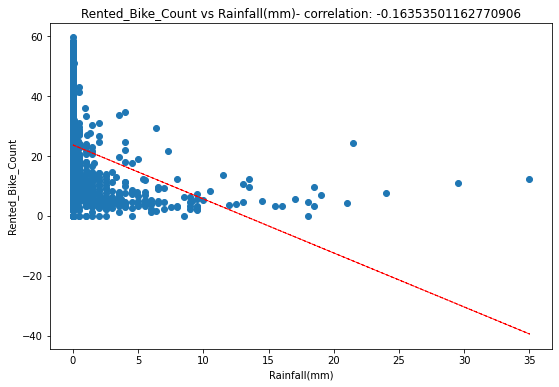

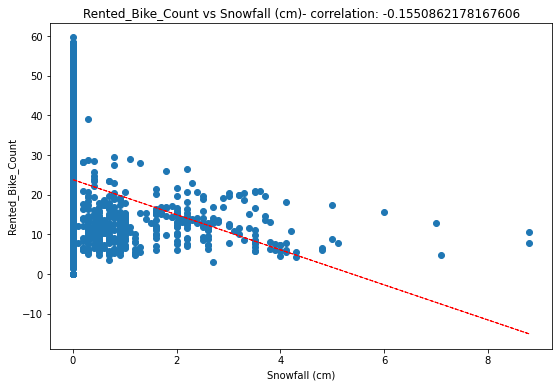

In [410]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

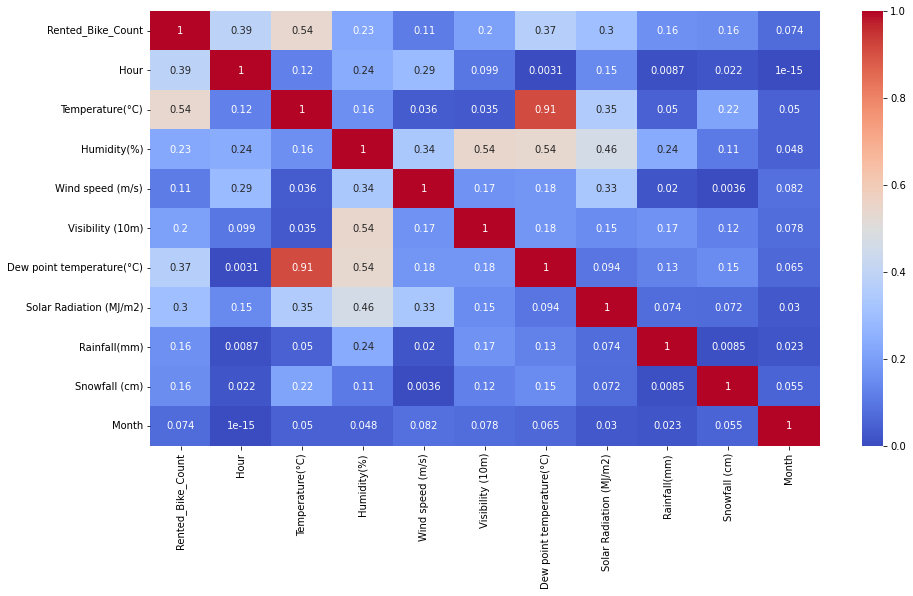

In [411]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: Temperature and Dew Point Temperataure columns are highly correlated. 

In [412]:
data=data.drop(['Dew point temperature(°C)'],axis=1)

In [413]:
#number of unique values in all columns
data.nunique()

Date                        365
Rented_Bike_Count          2166
Hour                         24
Temperature(°C)             546
Humidity(%)                  90
Wind speed (m/s)             65
Visibility (10m)           1789
Solar Radiation (MJ/m2)     345
Rainfall(mm)                 61
Snowfall (cm)                51
Seasons                       4
Holiday                       2
Functioning Day               2
Month                        12
dtype: int64

we need to label encode the categorical values of the columns Seasons and Holiday and drop the Functioning day column as it is very much correlated to Holiday column

In [414]:
data=data.drop('Functioning Day', axis=1)

In [415]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [416]:
data.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [417]:
data['Seasons'] = data['Seasons'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})
data['Holiday'] = data['Holiday'].map({'No Holiday':0,'Holiday':1})

In [418]:
data.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,01-12-2017,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,01-12-2017,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,01-12-2017,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,01-12-2017,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,01-12-2017,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


We can also drop the Date column as we want to predict the demand for bikes on hourly basis based on the conditions

In [419]:
data=data.drop(['Date'],axis=1)

In [420]:
data.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


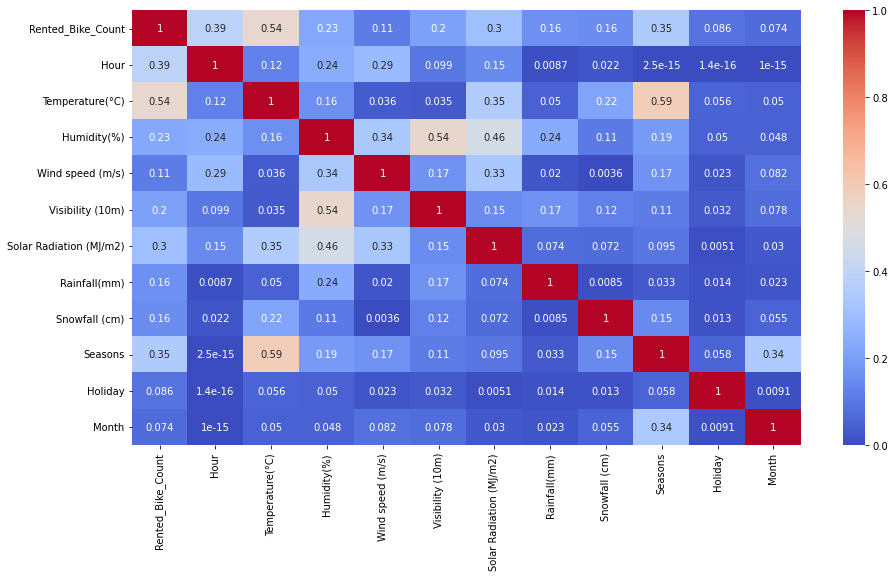

In [421]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [422]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [423]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.967912
1,Temperature(°C),4.579118
2,Humidity(%),6.103069
3,Wind speed (m/s),4.693856
4,Visibility (10m),5.540314
5,Solar Radiation (MJ/m2),2.272350
6,Rainfall(mm),1.081306
7,Snowfall (cm),1.127711
8,Seasons,5.480857
9,Holiday,1.056367


In [425]:
data = data.reset_index()

# **Prediction**

In [426]:
data_pred = data.copy()

In [427]:
data_pred.head()

,level_0,index,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
0,0,0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1
1,1,1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1
2,2,2,13.152946,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1
3,3,3,10.344080,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1
4,4,4,8.831761,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1


In [428]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  8760 non-null   int64  
 1   index                    8760 non-null   int64  
 2   Rented_Bike_Count        8760 non-null   float64
 3   Hour                     8760 non-null   int64  
 4   Temperature(°C)          8760 non-null   float64
 5   Humidity(%)              8760 non-null   int64  
 6   Wind speed (m/s)         8760 non-null   float64
 7   Visibility (10m)         8760 non-null   int64  
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   int64  
 12  Holiday                  8760 non-null   int64  
 13  Month                    8760 non-null   int64  
dtypes: float64(6), int64(8)


In [324]:
features=list(data_pred.columns.values.tolist())
features

['index',
 'Rented_Bike_Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Month']

In [325]:
data_pred.isnull().any().any()

False

In [326]:
data_pred.isnull().any()

index                      False
Rented_Bike_Count          False
Hour                       False
Temperature(°C)            False
Humidity(%)                False
Wind speed (m/s)           False
Visibility (10m)           False
Solar Radiation (MJ/m2)    False
Rainfall(mm)               False
Snowfall (cm)              False
Seasons                    False
Holiday                    False
Month                      False
dtype: bool

In [327]:
data_pred.describe()

,index,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,23.443395,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,1.504110,0.049315,6.526027
std,2528.938512,12.450984,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,1.114408,0.216537,3.448048
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2189.750000,13.820275,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
50%,4379.500000,22.461075,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,2.000000,0.000000,7.000000
75%,6569.250000,32.638167,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,2.000000,0.000000,10.000000
max,8759.000000,59.632206,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,3.000000,1.000000,12.000000


In [429]:

#y to contain only target variable
y=data_pred.pop('Rented_Bike_Count')

#X is all remainign variable also our independent variables
X=data_pred

In [443]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state = 0)

In [444]:
import sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form residual
resid = y_test - y_pred

In [450]:
#Root Mean Squared Error
RMSE = np.sqrt(np.mean(resid**2))
print('The Root Mean Squared Error is',RMSE)
print()

# Mean Absolute Error
MAE = np.mean(np.abs(resid))
print('The Mean Absolute Error is',MAE)
print()

#Rsquared
R2 = r2_score(y_test, y_pred)
print('The Rsquared value is',R2)

Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Root Mean Squared Error is 9.123032068743894

The Mean Absolute Error is 6.601374456699708

The Rsquared value is 0.47151125679775163
Adjusted R2 : 0.49022322641019334


# **Model 2**

In [ ]:
#y to contain only target variable
#y=data.pop('Rented_Bike_Count')

#X is all remainign variable also our independent variables
X=data.pop('Rainfall(mm)')

In [ ]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form residual
resid = y_test - y_pred

ValueError: ignored

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.coef_

In [ ]:
len(reg.coef_)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
# Let us scale continuous variables
cont_vars = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [ ]:
data_pred.describe()

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)